<a href="https://colab.research.google.com/github/rajlm10/audio/blob/main/Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import math

#Sample and Hear Audio

In [ ]:
sound, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [ ]:
#no of samples
len(sound)

117601

In [ ]:
%cd /root/.cache/librosa

/root/.cache/librosa


In [ ]:
Audio('/root/.cache/librosa/sorohanro_-_solo-trumpet-06.ogg')

In [ ]:
#Audio duration
len(sound)//sampling_rate

5

Text(0.5, 1.0, 'Time Domain Signal')

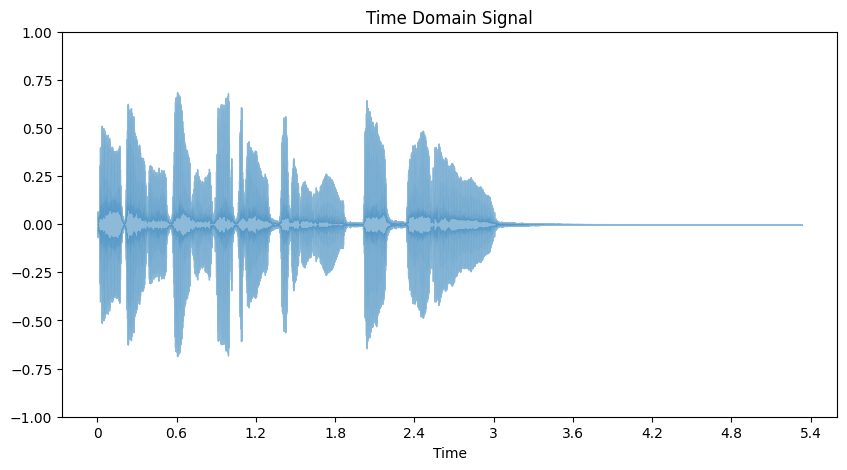

In [ ]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(sound, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Time Domain Signal")

#Calculating Amplitude Envelope

In [ ]:
FRAME_SIZE = 1024
HOP_SIZE = 512

def amplitude_envelope(signal,frame_size,hop_size):
  return np.array([max(signal[i:i+frame_size]) for i in range(0,len(signal),hop_size)])

In [ ]:
ae_sound = amplitude_envelope(sound,FRAME_SIZE,HOP_SIZE)
ae_sound.shape

(230,)

In [ ]:
t = librosa.frames_to_time(range(ae_sound.shape[0]), hop_length=HOP_SIZE)


Text(0.5, 1.0, 'Amplitude Envelope')

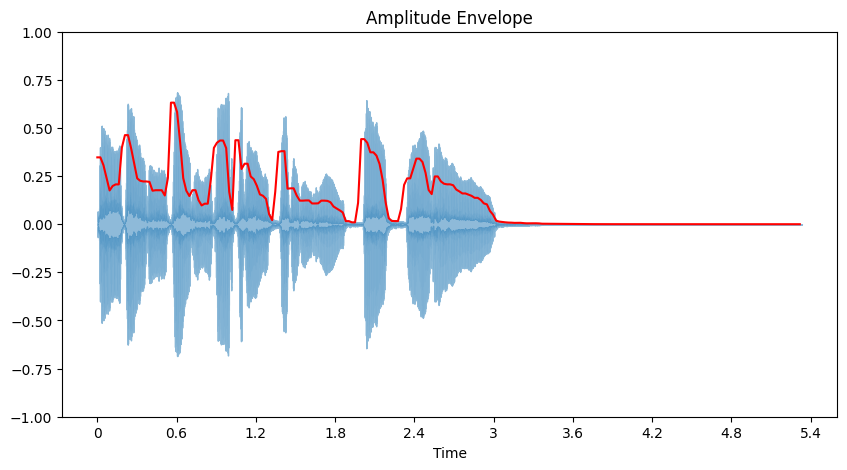

In [ ]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(sound, alpha=0.5)
plt.plot(t,ae_sound,color="r")
plt.ylim((-1, 1))
plt.title("Amplitude Envelope")

#RMS Energy

In [ ]:
rms_sound = librosa.feature.rms(y=sound,frame_length=FRAME_SIZE,hop_length=HOP_SIZE)[0]
t=librosa.frames_to_time(range(rms_sound.shape[0]),hop_length=HOP_SIZE)

Text(0.5, 1.0, 'RMS Energy')

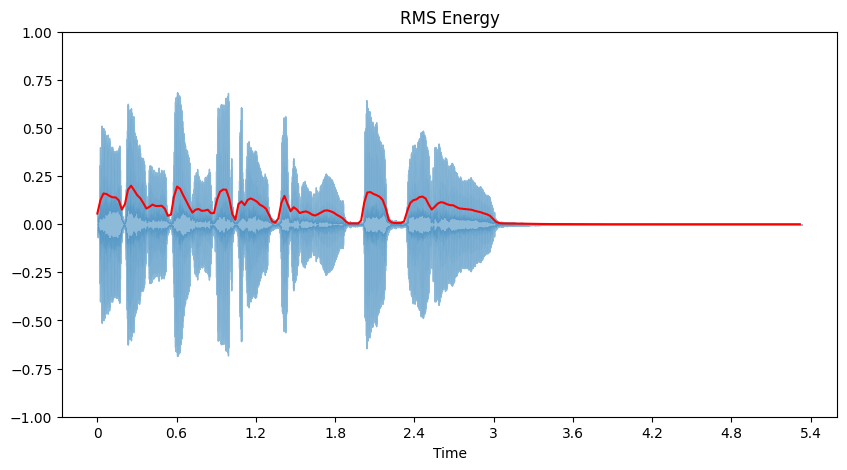

In [ ]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(sound, alpha=0.5)
plt.plot(t,rms_sound,color="r")
plt.ylim((-1, 1))
plt.title("RMS Energy")

#Zero-Crossing Rate

In [ ]:
zcr_sound = librosa.feature.zero_crossing_rate(sound, frame_length=FRAME_SIZE, hop_length=HOP_SIZE)[0]
t=librosa.frames_to_time(range(zcr_sound.shape[0]),hop_length=HOP_SIZE)
zcr_sound.shape

(230,)

Text(0.5, 1.0, 'Zero Crossing Rate')

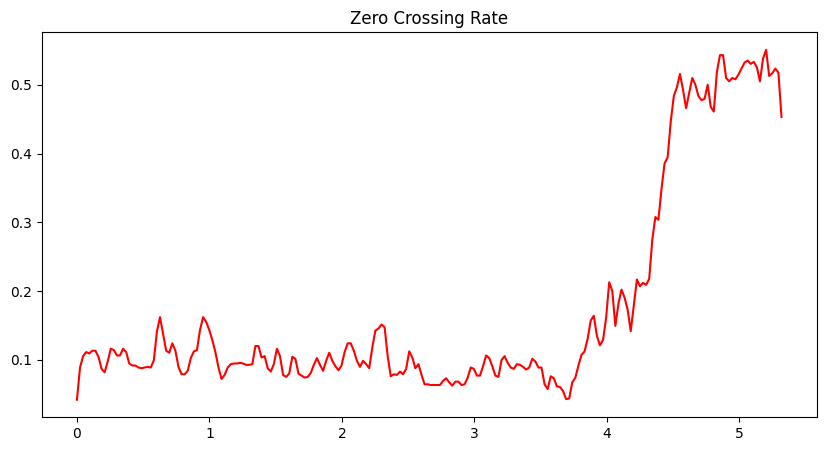

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t,zcr_sound,color="r")
plt.title("Zero Crossing Rate")

#Discrete Fourier Transform

In [ ]:
len(sound)

117601

In [ ]:
fft = np.fft.fft(sound)
len(fft)

117601

In [ ]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)

    plt.figure(figsize=(10, 5))

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)

    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)


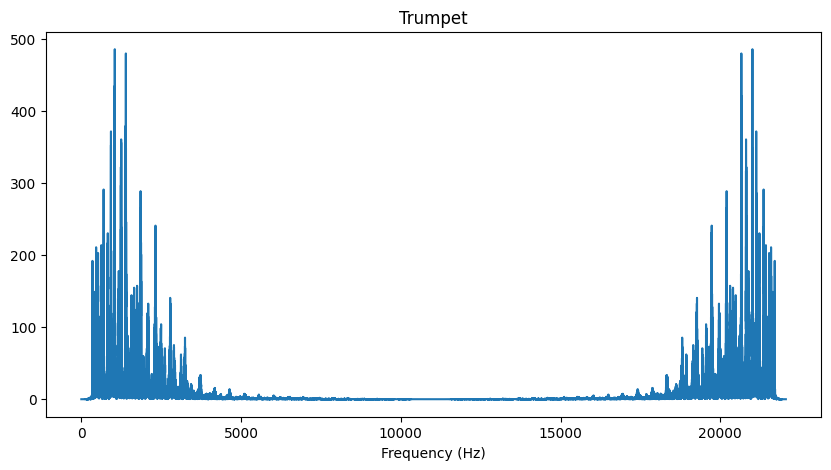

In [ ]:
plot_magnitude_spectrum(sound,sampling_rate,"Trumpet")

#Spectogram (Short-Time Fourier Transform)

freq_bins = frame_size//2 + 1

frames = (samples-frame_size)/hopsize + 1

In [ ]:
stft = librosa.stft(sound,n_fft = FRAME_SIZE, hop_length=HOP_SIZE)
stft.shape

(513, 230)

In [ ]:
#Complex number
stft[0][0]

(0.0005821231+0j)

In [ ]:
y_scale = np.abs(stft) ** 2
y_scale[0][0]

3.3886732e-07

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

##Linear Amplitude and Frequency Spectogram

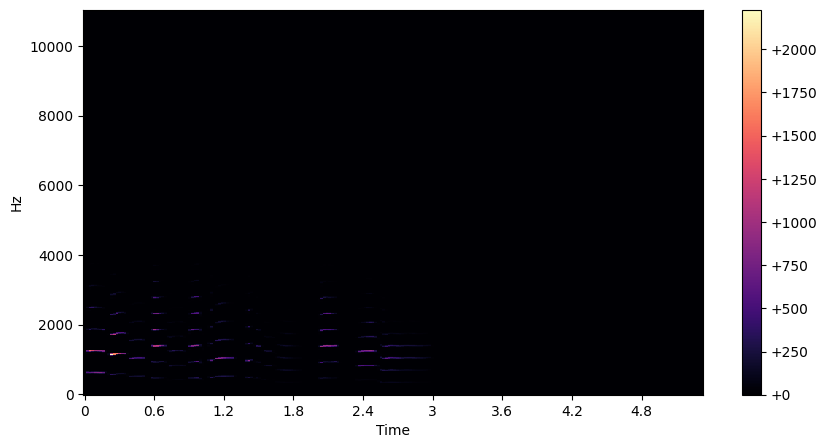

In [ ]:
plot_spectrogram(y_scale,sampling_rate,HOP_SIZE)

##Log Amplitude Spectogram

In [ ]:
y_log_scale = librosa.power_to_db(y_scale)

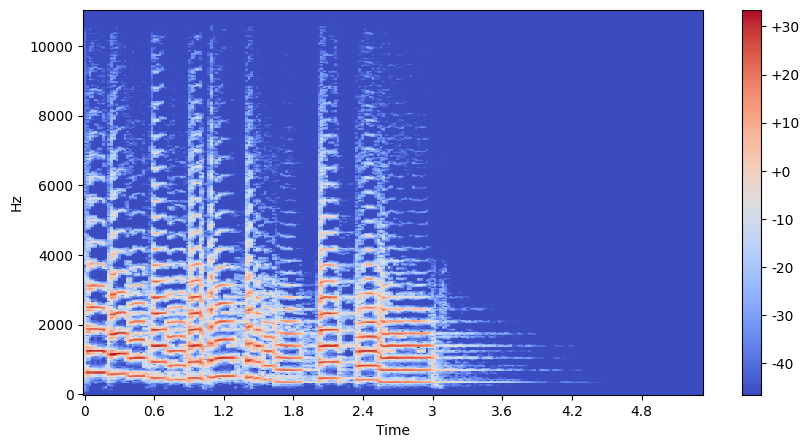

In [ ]:
plot_spectrogram(y_log_scale,sampling_rate,HOP_SIZE)

##Log-Frequency Spectogram

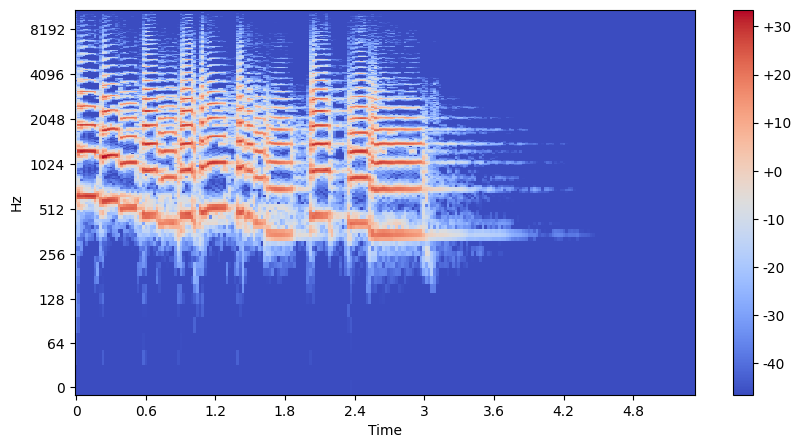

In [ ]:
plot_spectrogram(y_log_scale,sampling_rate,HOP_SIZE,"log")

#Mel Spectogram

(perceptually relevant frequency spectograms)

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=sound, sr=sampling_rate, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=10)
mel_spectrogram.shape

(10, 230)

In [ ]:
#Real number
mel_spectrogram[0][0]

0.003470584

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

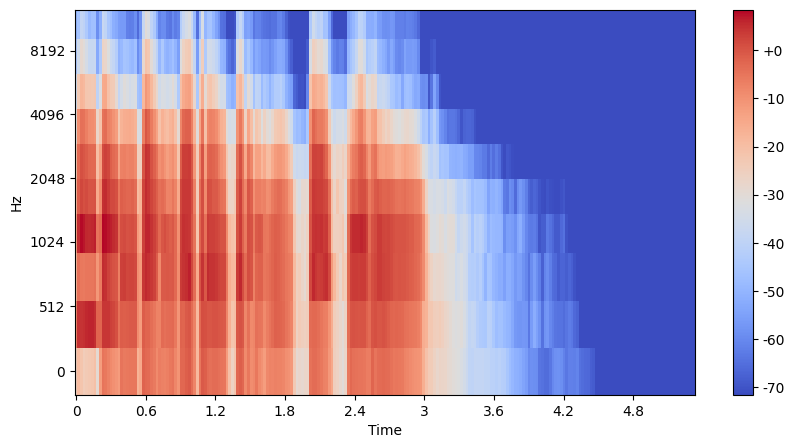

In [ ]:
plot_spectrogram(log_mel_spectrogram,sampling_rate,HOP_SIZE,"mel")

#Mel Frequency Cepstral Coefficients

In [ ]:
mfccs = librosa.feature.mfcc(y=sound, n_mfcc=13, sr=sampling_rate)
mfccs.shape

(13, 230)

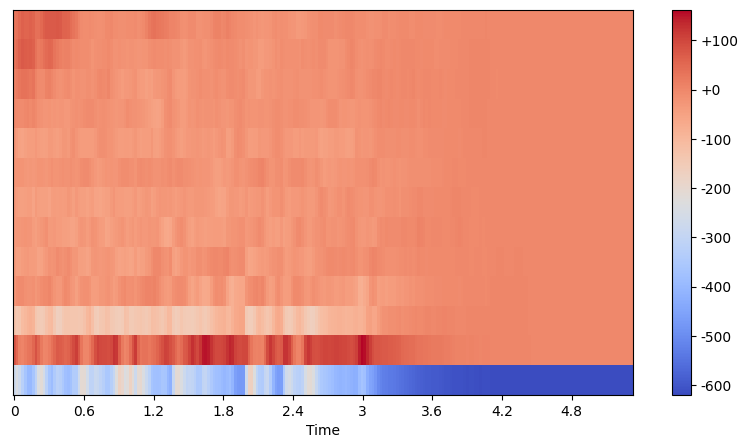

In [ ]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sampling_rate)
plt.colorbar(format="%+2.f")
plt.show()

##First and second derivatives

In [ ]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
mfccs_features.shape

(39, 230)

#Band Energy Ratio

In [ ]:
stft = librosa.stft(sound,n_fft = FRAME_SIZE, hop_length=HOP_SIZE)
stft.shape

(513, 230)

In [ ]:
def map_split_frequency_to_bin(split_frequency,sampling_rate,num_bins):
  frequency_range = sampling_rate/2
  bin_range = frequency_range/num_bins
  split_frequency_bin = math.floor(split_frequency / bin_range)
  return int(split_frequency_bin)

def band_energy_ratio(spectrogram, split_frequency, sampling_rate):
  split_frequency_bin = map_split_frequency_to_bin(split_frequency, sampling_rate, len(spectrogram[0]))

  band_energy_ratio = []


  # calculate power spectrogram
  power_spectrogram = np.abs(spectrogram) ** 2

  #To loop over time dimension
  power_spectrogram = power_spectrogram.T

  for frame in power_spectrogram:
    ber = np.sum(frame[:split_frequency_bin])/np.sum(frame[split_frequency_bin:])
    band_energy_ratio.append(ber)

  return np.array(band_energy_ratio)


In [ ]:
ber_sound = band_energy_ratio(stft,2000,sampling_rate)

ber_sound.shape

(230,)

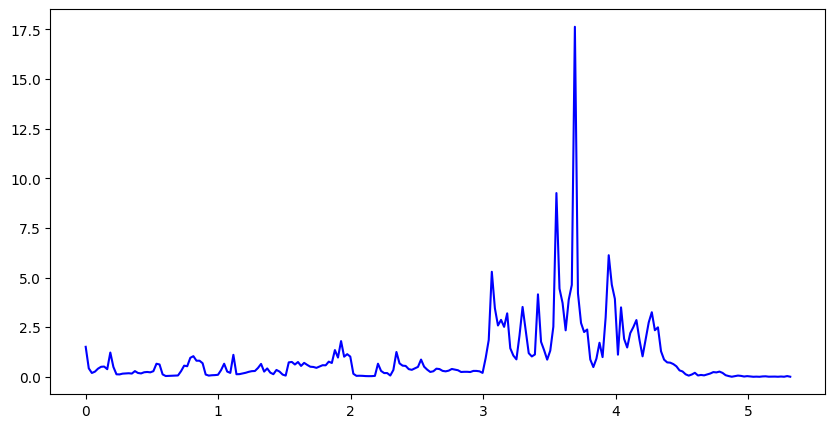

In [ ]:
t = librosa.frames_to_time(range(len(ber_sound)),hop_length=HOP_SIZE)

plt.figure(figsize=(10, 5))
plt.plot(t, ber_sound, color="b")
plt.show()


#Spectral Centroid

In [ ]:
sc_sound = librosa.feature.spectral_centroid(y=sound, sr=sampling_rate, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_sound.shape

(230,)

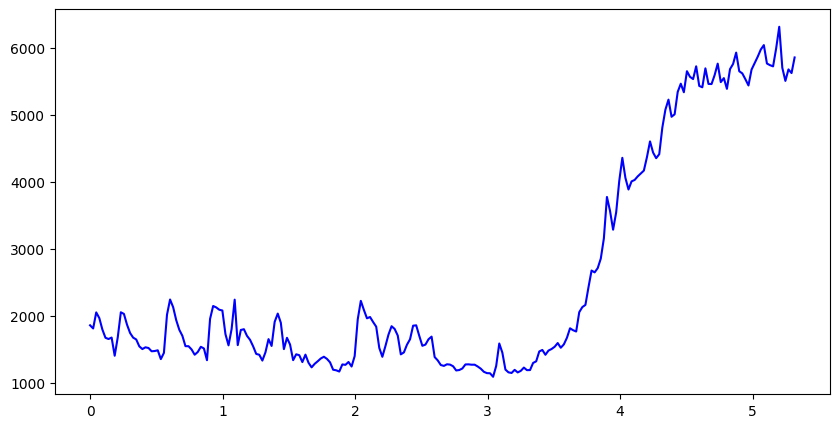

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t, sc_sound, color="b")
plt.show()

#Spectral Bandwidth

In [ ]:
sb_sound = librosa.feature.spectral_bandwidth(y=sound, sr=sampling_rate, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sb_sound.shape

(230,)

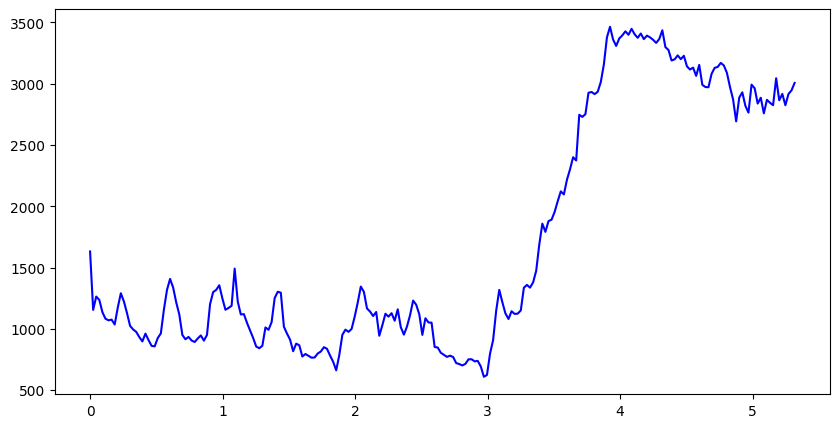

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t, sb_sound, color="b")
plt.show()